# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file = "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

In [3]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
def imshow(img, cmap=None):
    if len(img.shape) == 3 and img.shape[2] == 1:
        img = np.reshape(img, img.shape[:2])
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    

First, let's plot every nth image from the dataset and have a look at them.

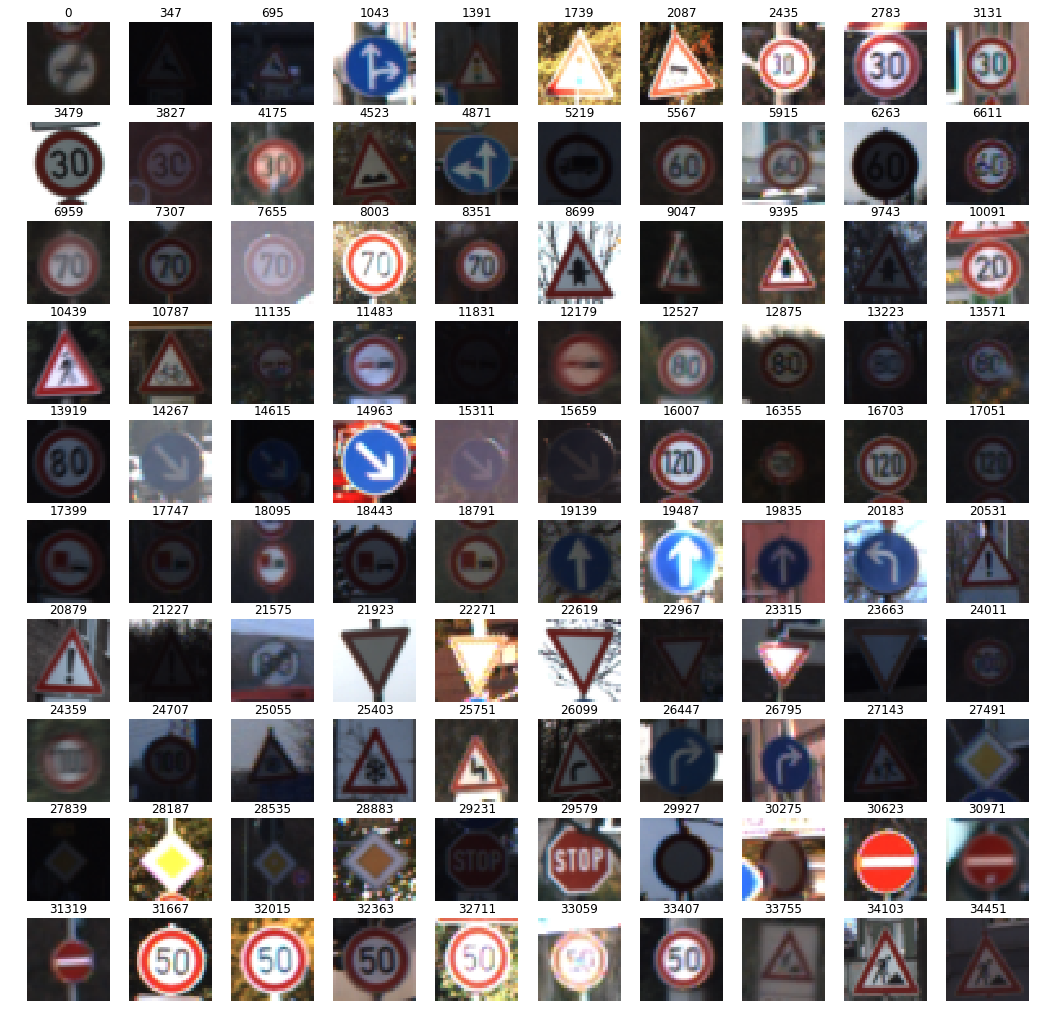

In [5]:
def plot_dataset(X, cmap=None, nrows=10, ncols=10):
    nImages = X.shape[0]
    plt.figure(figsize=(18/nrows*ncols,18))
    for r in range(nrows):
        for c in range(ncols):
            nPlot = r*ncols + c
            idx = int(nImages * nPlot / (nrows * ncols))
            img = X[idx]
            plt.subplot(nrows, ncols, nPlot + 1)
            imshow(img, cmap=cmap)
            plt.title(str(idx))

plot_dataset(X_train)

The most noticeable thing we see in the image above is that the images vary a lot in brightness. Preprocessing should take care of this. Now let's have a look at class distribution.

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

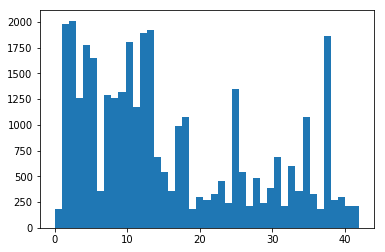

In [6]:
plt.hist(y_train, n_classes)

(array([  30.,  240.,  240.,  150.,  210.,  210.,   60.,  150.,  150.,
         150.,  210.,  150.,  210.,  240.,   90.,   90.,   60.,  120.,
         120.,   30.,   60.,   60.,   60.,   60.,   30.,  150.,   60.,
          30.,   60.,   30.,   60.,   90.,   30.,   90.,   60.,  120.,
          60.,   30.,  210.,   30.,   60.,   30.,   30.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

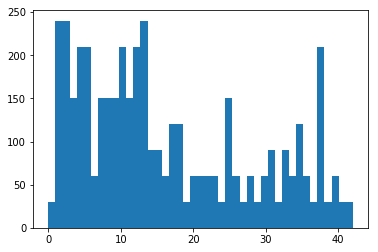

In [7]:
plt.hist(y_valid, n_classes)

Class distribution looks pretty much the same for training and validation datasets, which means they are probably sampled from the same population.

We can see that some classes have very few examples in the training set. It means that generating more (fake) images should help improve the classification.

----

## Step 2: Design and Test a Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

First, I will normalize image brightness by using what's known as histogram normalization in the brightness channel in YUV color space. The visualization below demonstrates that the resulting images have much more similar brightness.

In [8]:
def normalize_brightness(img):
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

As a second step here, I convert every image to grayscale and standardize pixel values per each image.

I've tried a bunch of different normalization approaches, including keeping the original RGB color space and normalizing every channel separately, using normalization instead of standardization, etc. The current approach showed best results out of all tested approaches.

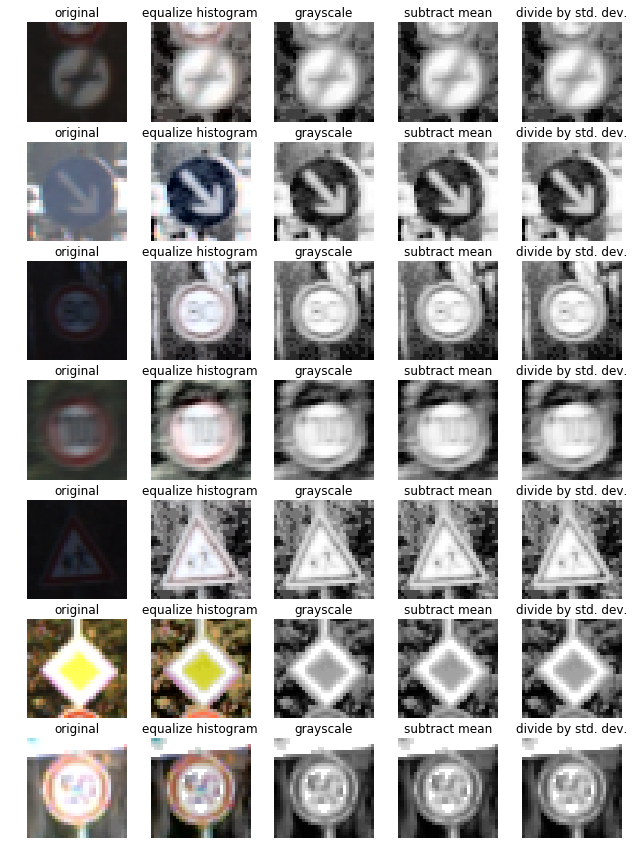

In [9]:
def normalize_brightness(img):
        img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
        return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def to_grayscale(img):
    return np.reshape(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), [32,32,1])

# def unsharp_mask(kernel_size, sigma, c1, c2):
#     def inner(img):
#         gaussian = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
#         return cv2.addWeighted(img, c1, gaussian, c2, 0)
#     return inner

def subtract_mean(img):
    return img - np.mean(img)

def divide_by_std(img):
    return img / np.std(img)

def normalize_image(img):
    img = normalize_brightness(img)
#     img = unsharp_mask(9, 1, 2, -1)(img)
    img = to_grayscale(img)
    img = subtract_mean(img)
    img = divide_by_std(img)
    return img

INPUT_CHANNELS=1

def preprocess_dataset(d):
    return np.array([normalize_image(img) for img in d[:]])

def plot_preprocess(X, steps, titles):
    nImages = len(X)
    ncols = len(steps) + 1
    plt.figure(figsize=(15/nImages*ncols,15))
    nPlot = 0
    for r in range(nImages):
        img = X[r]
        nPlot += 1
        plt.subplot(nImages, ncols, nPlot)
        imshow(img, cmap="gray" if img.shape[-1] == 1 else None)
        plt.title(titles[0])
        
        for c in range(len(steps)):
            nPlot += 1
            plt.subplot(nImages, ncols, nPlot)
            img = steps[c](img)
            imshow(img, cmap="gray" if img.shape[-1] == 1 else None)
            plt.title(titles[c + 1])

plot_preprocess(
    [X_train[0], X_train[14267], X_train[13223], X_train[24359], X_train[27143], X_train[28187], X_train[33059]], 
    [normalize_brightness, to_grayscale, subtract_mean, divide_by_std],
    ["original", "equalize histogram", "grayscale", "subtract mean", "divide by std. dev."]
)

In [10]:
X_train_pre = preprocess_dataset(X_train)
X_valid_pre = preprocess_dataset(X_valid)
X_test_pre = preprocess_dataset(X_test)

Also the images are standardized globally. This step doesn't help much now, and it used to help more when I didn't standardize per-image. However, it feels like per-image standardization makes images look more similar.

In [11]:
def standardize_dataset(X, mean_pixel=None, std_pixel=None):
    if mean_pixel is None:
        mean_pixel = np.mean(X, axis=(0,1,2))
    X = X - mean_pixel
    if std_pixel is None:
        std_pixel = np.std(X, axis=(0,1,2))
    X = X / std_pixel
    return X, mean_pixel, std_pixel

In [12]:
X_train_norm, mean_pixel, std_pixel = standardize_dataset(X_train_pre)
X_valid_norm = standardize_dataset(X_valid_pre, mean_pixel=mean_pixel, std_pixel=std_pixel)[0]
X_test_norm = standardize_dataset(X_test_pre, mean_pixel=mean_pixel, std_pixel=std_pixel)[0]

print(mean_pixel)
print(std_pixel)

# X_train_norm = X_train_pre
# X_valid_norm = X_valid_pre
# X_test_norm = X_test_pre

[  2.34960840e-19]
[ 1.]


The following function generates a given number of variants for every image in the training dataset by applying random rotation, scaling and translation.

In [13]:
from collections import Counter
import random

def image_variants(img, num_variants):
    result = []
    for i in range(num_variants):
        rows, cols = img.shape[:2]

        angle = random.randrange(-13, 14, 1)
        scale = 1. + random.randrange(-10, 11, 1) / 100.
        
        # rotation and proportional scaling
        M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale)
        
        # translation along X and Y axis 
        translateX = random.randrange(-2, 3, 1)
        translateY = random.randrange(-2, 3, 1)
        
        M = np.dot(M, np.float32([[1, 0, translateX], [0, 1, translateY], [0, 0, 1]]))

        # independent scaling on axes
        scaleX = 1. + random.randrange(-20, 21, 1) / 100.
        scaleY = 1. + random.randrange(-20, 21, 1) / 100.
        
        M = np.dot(M, np.float32([[scaleX, 0, -cols*(scaleX - 1)/2],[0, scaleY, -rows*(scaleY - 1)/2], [0, 0, 1]]))
        newImg = cv2.warpAffine(img, M, (cols, rows))
        
        result.append(np.reshape(newImg, [32, 32, 1]))

    return result

The image below demonstrates the resulting image variants.

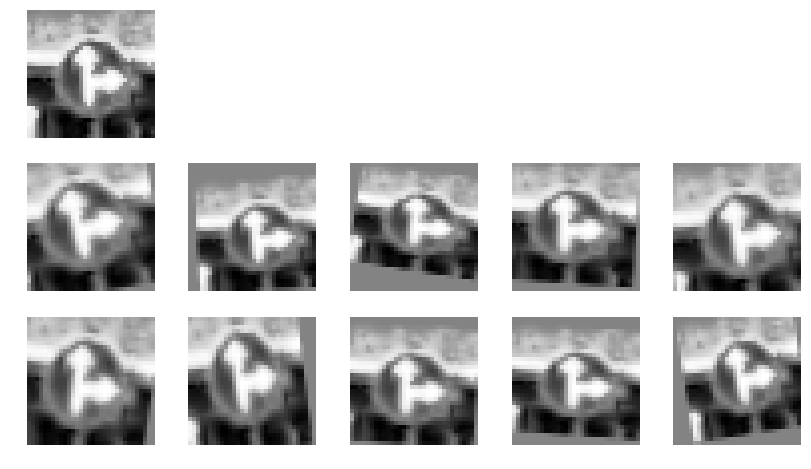

In [14]:
plt.figure(figsize=(14,8))
plt.subplot(3, 5, 1)
imshow(X_train_norm[900], cmap="gray")
variants = image_variants(X_train_norm[900], 10)
for i in range(10):
    plt.subplot(3, 5, 6 + i)
    imshow(variants[i], cmap="gray")

In [15]:
class_counts = Counter(y_train)
most_frequent_counts = class_counts.most_common(1)[0][1]

def generate_images(X, y):
    X_result, y_result = [], []
    for img, label in zip(list(X), y):
        X_result.append(img)
        y_result.append(label)
        X_result.append(img)
        y_result.append(label)
        for variant in image_variants(img, 10):
            X_result.append(variant)
            y_result.append(label)
    return np.array(X_result, ndmin=4), np.array(y_result)

X_train_norm_aug, y_train_aug = generate_images(X_train_norm, y_train)

Let's verify that the class distribution still looks the same.

(array([  2160.,  23760.,  24120.,  15120.,  21240.,  19800.,   4320.,
         15480.,  15120.,  15840.,  21600.,  14040.,  22680.,  23040.,
          8280.,   6480.,   4320.,  11880.,  12960.,   2160.,   3600.,
          3240.,   3960.,   5400.,   2880.,  16200.,   6480.,   2520.,
          5760.,   2880.,   4680.,   8280.,   2520.,   7188.,   4320.,
         12960.,   3960.,   2160.,  22320.,   3240.,   3600.,   2520.,
          2520.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.209

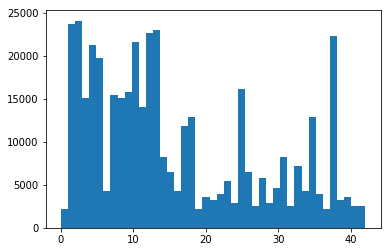

In [16]:
plt.hist(y_train_aug, n_classes)

The following image displays the resulting training dataset after all normalization and augmentation steps.

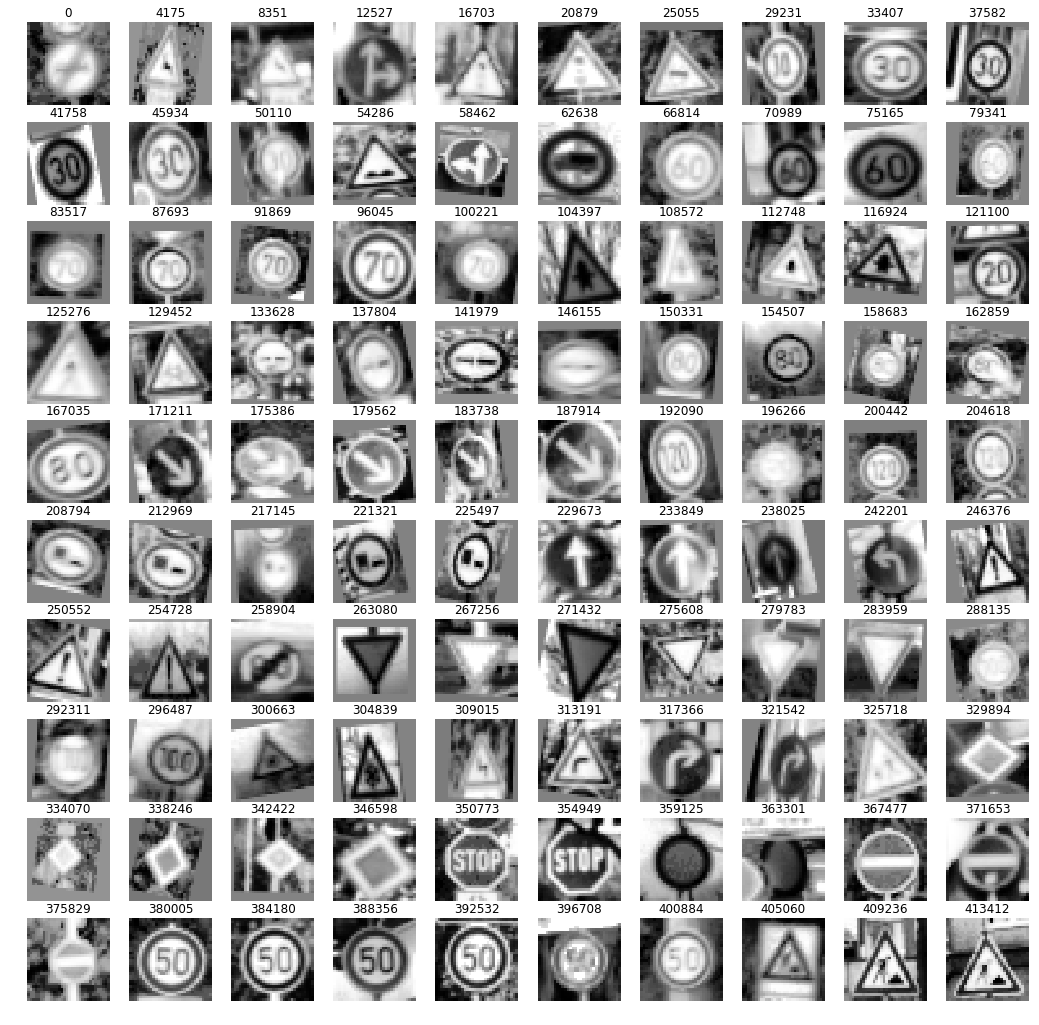

In [17]:
plot_dataset(X_train_norm_aug, cmap="gray")

### Model Architecture

In [18]:
from sklearn.utils import shuffle

X_train_norm_aug, y_train_aug = shuffle(X_train_norm_aug, y_train_aug)

BATCH_SIZE and rate parameters were taken from the video lectures and seem to work well, so I didn't change them.
The EPOCHS parameter was chosen so that the best validation accuracy is achieved, while not doing too many unnecessary training iterations.

I used a somewhat standard parameter of 0.5 for the dropout layer, and that proved to be pretty beneficial. I tried some other values, too, but there were no gains from that.

In [19]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 50
BATCH_SIZE = 128
rate = 0.001

DROPOUT_FC1 = 0.5

The following function generates two nets, one using dropout for training and another not using dropout for validation/testing.

In order to design the net, I started with the LeNet example from video lectures. After that, I figured out that dropping some of the original layers doesn't decrease accuracy, so I dropped these layers. Later I noticed that the 3x3 window for convolutional layers works better than LeNet's 5x5 window for this dataset, so I added more convolutional layers while decreasing the window size.

In [20]:
def net(x, reuse, is_training):
    with tf.variable_scope("ConvNet", reuse=reuse):
        # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
        mu = 0
        sigma = 0.1

        conv1_neurons = 8

        # Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x8.
        conv1_W = tf.get_variable("conv1_W", initializer=tf.truncated_normal(shape=(3, 3, INPUT_CHANNELS, conv1_neurons), mean = mu, stddev = sigma))
        conv1_b = tf.get_variable("conv1_b", initializer=tf.zeros(conv1_neurons))
        conv1_Wb = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

        conv1_relu = tf.nn.relu(conv1_Wb)
        
        conv2_neurons = 8

        # Layer 2: Convolutional. Input = 30x30x8. Output = 28x28x8.
        conv2_W = tf.get_variable("conv2_W", initializer=tf.truncated_normal(shape=(3, 3, conv1_neurons, conv2_neurons), mean = mu, stddev = sigma))
        conv2_b = tf.get_variable("conv2_b", initializer=tf.zeros(conv2_neurons))
        conv2_Wb   = tf.nn.conv2d(conv1_relu, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

        conv2_relu = tf.nn.relu(conv2_Wb)

        # Pooling. Input = 28x28x8. Output = 14x14x8.
        conv2 = tf.nn.max_pool(conv2_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        conv3_neurons = 16

        # Layer 3: Convolutional. Output = 10x10x16.
        conv3_W = tf.get_variable("conv3_W", initializer=tf.truncated_normal(shape=(5, 5, conv2_neurons, conv3_neurons), mean = mu, stddev = sigma))
        conv3_b = tf.get_variable("conv3_b", initializer=tf.zeros(conv3_neurons))
        conv3_Wb   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

        conv3_relu = tf.nn.relu(conv3_Wb)

        # Pooling. Input = 10x10x16. Output = 5x5x16.
        conv3 = tf.nn.max_pool(conv3_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # Flatten. Input = 5x5x16. Output = 400.
        fc0   = flatten(conv3)
        
        # Layer 4: Fully Connected. Input = 400, output = 100.
        fc1_W  = tf.get_variable("fc1_W", initializer=tf.truncated_normal(shape=(400, 100), mean = mu, stddev = sigma))
        fc1_b  = tf.get_variable("fc1_b", initializer=tf.zeros(100))
        fc1    = tf.matmul(fc0, fc1_W) + fc1_b

        # Activation.
        fc1    = tf.nn.relu(fc1)
        
        fc1 = tf.layers.dropout(fc1, rate=DROPOUT_FC1, training=is_training)
        
        # Layer 5: Fully Connected. Input = 100. Output = n_classes.
        global n_classes
        fc2_W  = tf.get_variable("fc2_W", initializer=tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma))
        fc2_b  = tf.get_variable("fc2_b", initializer=tf.zeros(n_classes))
        logits = tf.matmul(fc1, fc2_W) + fc2_b

    return logits, locals()

### Train, Validate and Test the Model

In [21]:
x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_CHANNELS))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits_train = net(x, False, True)[0]
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits_train)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [22]:
logits_test, net_dict = net(x, True, False)
correct_prediction = tf.equal(tf.argmax(logits_test, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
saver = tf.train.Saver()

train_accuracies, validation_accuracies = [], []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm_aug)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm_aug, y_train_aug = shuffle(X_train_norm_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm_aug[offset:end], y_train_aug[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        train_accuracy = evaluate(sess, X_train_norm_aug, y_train_aug)
        train_accuracies.append(train_accuracy)
        validation_accuracy = evaluate(sess, X_valid_norm, y_valid)
        validation_accuracies.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.923
Validation Accuracy = 0.959

EPOCH 2 ...
Train Accuracy = 0.962
Validation Accuracy = 0.981

EPOCH 3 ...
Train Accuracy = 0.972
Validation Accuracy = 0.985

EPOCH 4 ...
Train Accuracy = 0.979
Validation Accuracy = 0.991

EPOCH 5 ...
Train Accuracy = 0.982
Validation Accuracy = 0.990

EPOCH 6 ...
Train Accuracy = 0.984
Validation Accuracy = 0.992

EPOCH 7 ...
Train Accuracy = 0.986
Validation Accuracy = 0.994

EPOCH 8 ...
Train Accuracy = 0.986
Validation Accuracy = 0.993

EPOCH 9 ...
Train Accuracy = 0.988
Validation Accuracy = 0.993

EPOCH 10 ...
Train Accuracy = 0.990
Validation Accuracy = 0.992

EPOCH 11 ...
Train Accuracy = 0.989
Validation Accuracy = 0.994

EPOCH 12 ...
Train Accuracy = 0.990
Validation Accuracy = 0.992

EPOCH 13 ...
Train Accuracy = 0.991
Validation Accuracy = 0.993

EPOCH 14 ...
Train Accuracy = 0.991
Validation Accuracy = 0.993

EPOCH 15 ...
Train Accuracy = 0.991
Validation Accuracy = 0.994

EPOCH 16 ...
Train Ac

In [24]:
TRAIN_ACCURACIES_NO_DROPOUT = [0.94625563953957759, 0.97304280774351748, 0.98174516509095089, 0.9875283772579293, 0.99060796766190595, 0.98917832887918233, 0.99246386390413521, 0.99432215485119302, 0.99489688401007692, 0.99545245553033135, 0.99531835205992514, 0.99443231127331244, 0.99550034962690503, 0.99501422454668242, 0.99657557210069303, 0.99679109552956502, 0.99739456114639313, 0.99723172121804271, 0.99533032558406853, 0.99686054196959684, 0.99593139649606788, 0.99721256357941324, 0.99660909796258512, 0.99714311713938142, 0.99721256357941324, 0.99680546375853707, 0.99648936272115096, 0.99796929030527692, 0.99790463327490253, 0.9969275937048, 0.99772742511758006, 0.99821594490263132, 0.99707606540417826, 0.99759092694234508, 0.99750950697816987, 0.99515311742674595, 0.99689406783719836, 0.99768192572583503, 0.99754542755060016, 0.99754063814094274, 0.99737061409810623, 0.99778489803346837, 0.9982758125233484, 0.99869009645871054, 0.99863022883799346, 0.99727482590495897, 0.99851528300621661, 0.99784237094935679, 0.99830694368612127, 0.99739456114639313]
VALID_ACCURACIES_NO_DROPOUT = [0.9766439912000211, 0.9818594107011549, 0.9834467120181406, 0.98798185941043082, 0.98730158730158735, 0.98684807256235829, 0.99070294784580504, 0.98979591734014671, 0.98775510204081629, 0.99183673496419344, 0.98979591734014671, 0.98571428571428577, 0.9886621315192744, 0.98820861705036123, 0.98684807180547385, 0.98684807204875813, 0.99115646258503398, 0.9895691609977324, 0.98979591836734693, 0.99138321995464851, 0.99160997732426304, 0.99002267600727734, 0.99183673469387756, 0.99160997732426304, 0.99206349233380786, 0.98752834494151764, 0.98979591785374688, 0.99024943310657598, 0.99138321944104846, 0.98911564625850346, 0.99115646258503398, 0.99047619047619051, 0.98866213100567424, 0.98911564625850346, 0.98888888888888893, 0.98820861626644518, 0.99092970521541945, 0.98979591836734693, 0.9886621315192744, 0.99183673469387756, 0.99160997732426304, 0.99047619047619051, 0.99115646207143393, 0.99024943310657598, 0.99047619047619051, 0.98934240362811787, 0.99115646258503398, 0.99160997732426304, 0.98956916048413235, 0.98979591836734693]

TRAIN_ACCURACIES_DROPOUT_FC1_05 = [0.92500263417588247, 0.95571951301682267, 0.97001590084976852, 0.97816268667295081, 0.98135722290870431, 0.98263838999604614, 0.9856868492446722, 0.98690575399676239, 0.98784687300014418, 0.98626397310267533, 0.98878559729298776, 0.98924298591526616, 0.9908689904882324, 0.98908493539657316, 0.99026313016657563, 0.9908282805061448, 0.99062233589087811, 0.99115396036284564, 0.992037606450339, 0.99079714934337193, 0.99111564509129613, 0.99267938733871663, 0.99173587364192506, 0.9920831058363746, 0.99290927900227022, 0.99382884565648433, 0.99321580122034159, 0.99335469410611466, 0.99254528386831042, 0.99332116823280359, 0.99343850876940909, 0.99344569288389517, 0.9927224920256329, 0.99405873732003791, 0.99334511528508707, 0.99276320201342994, 0.99372108393919367, 0.99312959185221839, 0.99318467006327815, 0.99377855686079142, 0.99380250390336888, 0.99379292508405415, 0.99352471814324161, 0.99405873732003791, 0.99497111986547548, 0.99355345460118583, 0.99449936301422504, 0.99429581309807757, 0.9943820224719101, 0.99467896587066673]
VALID_ACCURACIES_DROPOUT_FC1_05 = [0.96643990929705215, 0.98299319754922743, 0.98866213178959017, 0.98820861705036123, 0.99092970548573533, 0.98820861705036123, 0.99138322022496439, 0.99183673496419344, 0.99433106602995303, 0.99115646258503398, 0.99319727893859622, 0.99206349182020781, 0.99501133813879661, 0.99274376419936716, 0.99274376444265144, 0.99251700707303692, 0.99410430839002273, 0.99183673445059328, 0.99297052181226597, 0.99274376392905128, 0.99410430814673845, 0.99410430814673845, 0.99251700655943687, 0.99569160973404003, 0.99365079367782527, 0.99501133762519645, 0.99387755077712392, 0.99455782288596739, 0.99410430790345417, 0.99387755026352376, 0.99501133762519645, 0.99410430814673845, 0.99478458001229764, 0.99365079340750939, 0.99501133762519645, 0.99342403579461058, 0.99433106500275281, 0.99365079340750939, 0.99387755077712392, 0.99546485263474138, 0.99342403603789486, 0.99433106551635297, 0.99523809499481097, 0.99319727866828034, 0.99455782288596739, 0.99365079340750939, 0.99546485287802555, 0.99523809499481097, 0.99365079262359346, 0.99455782315628327]

def plot_epochs(lines, title):
    plt.figure(figsize=(20,10))
    legends = []
    for points, legend in lines:
        plt.plot(points)
        legends.append(legend)
    plt.legend(legends)
    plt.grid(which="both")
    plt.title(title)


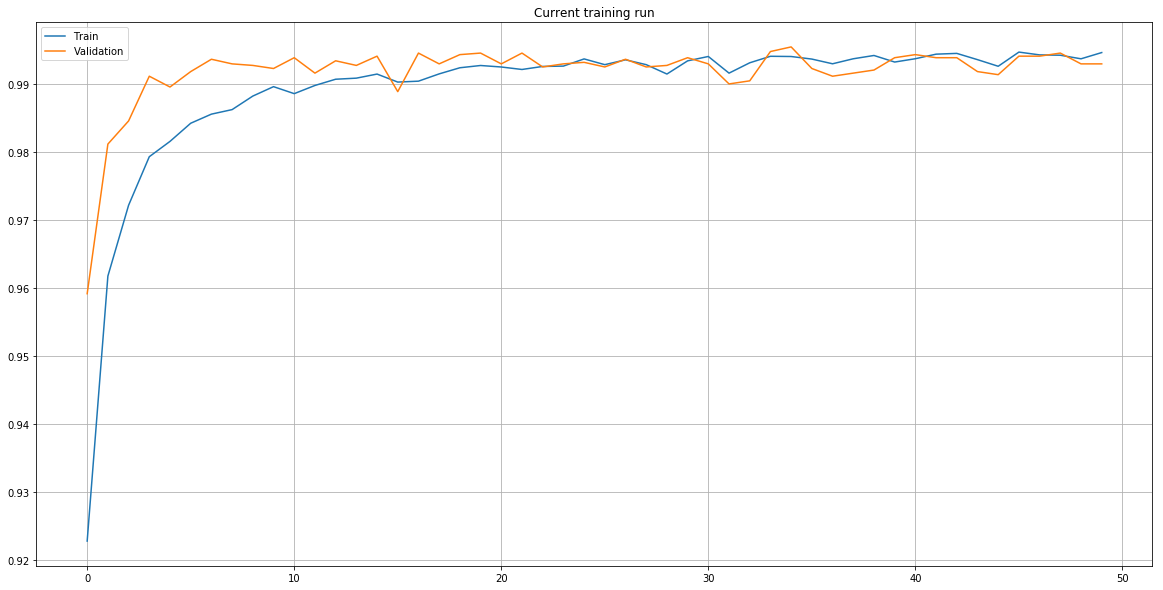

In [25]:
plot_epochs([(train_accuracies, "Train"), (validation_accuracies, "Validation")], "Current training run")

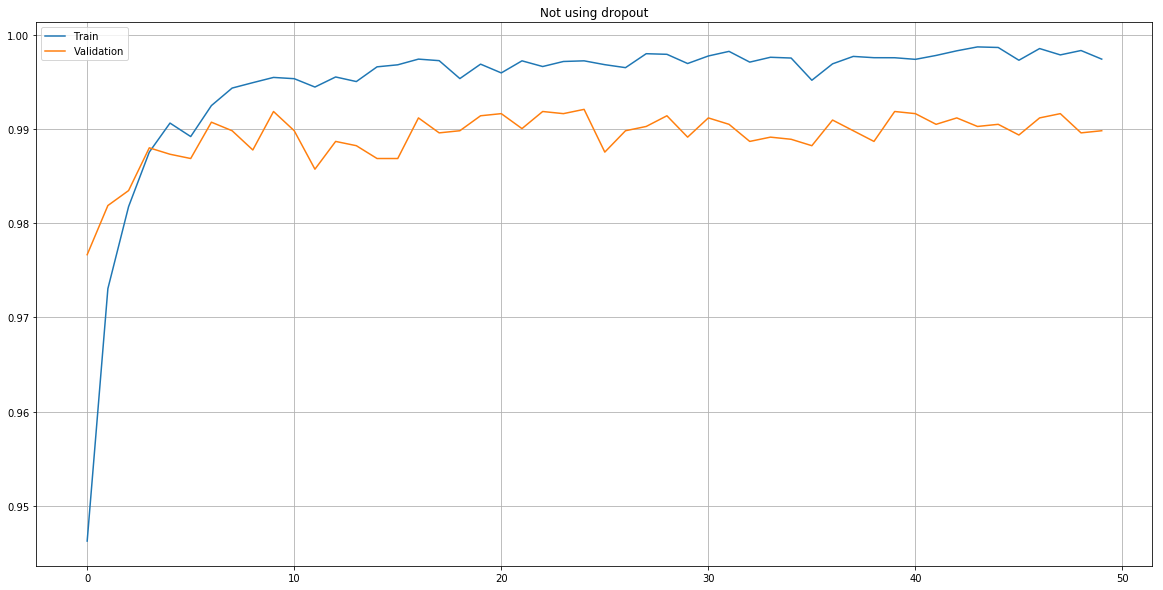

In [26]:
plot_epochs([(TRAIN_ACCURACIES_NO_DROPOUT, "Train"), (VALID_ACCURACIES_NO_DROPOUT, "Validation")], "Not using dropout")

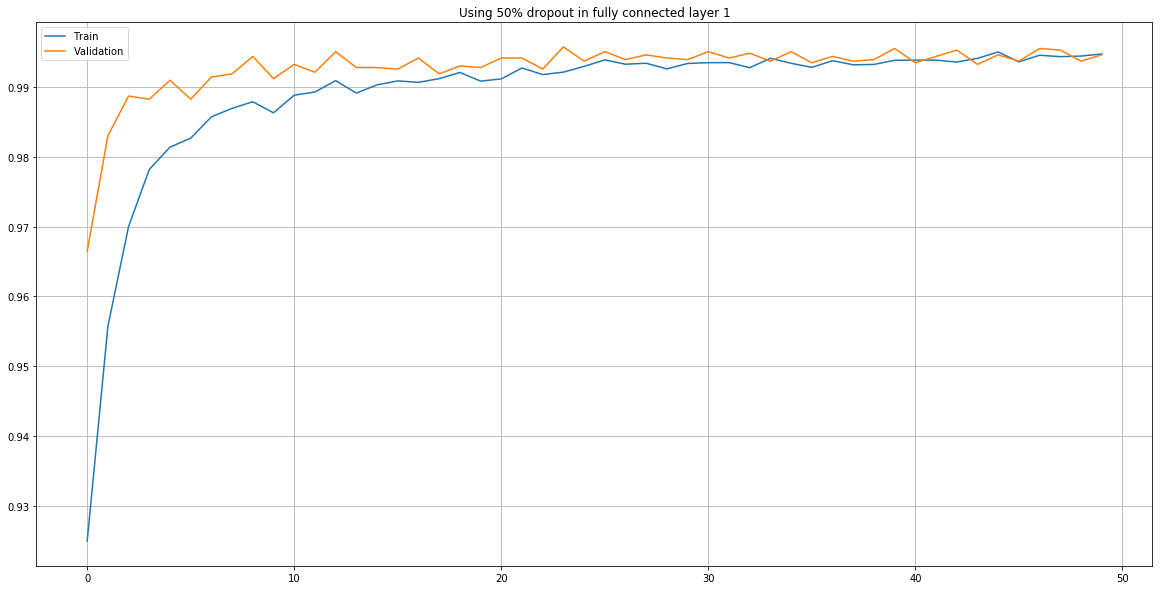

In [27]:
plot_epochs([(TRAIN_ACCURACIES_DROPOUT_FC1_05, "Train"), (VALID_ACCURACIES_DROPOUT_FC1_05, "Validation")], "Using 50% dropout in fully connected layer 1")

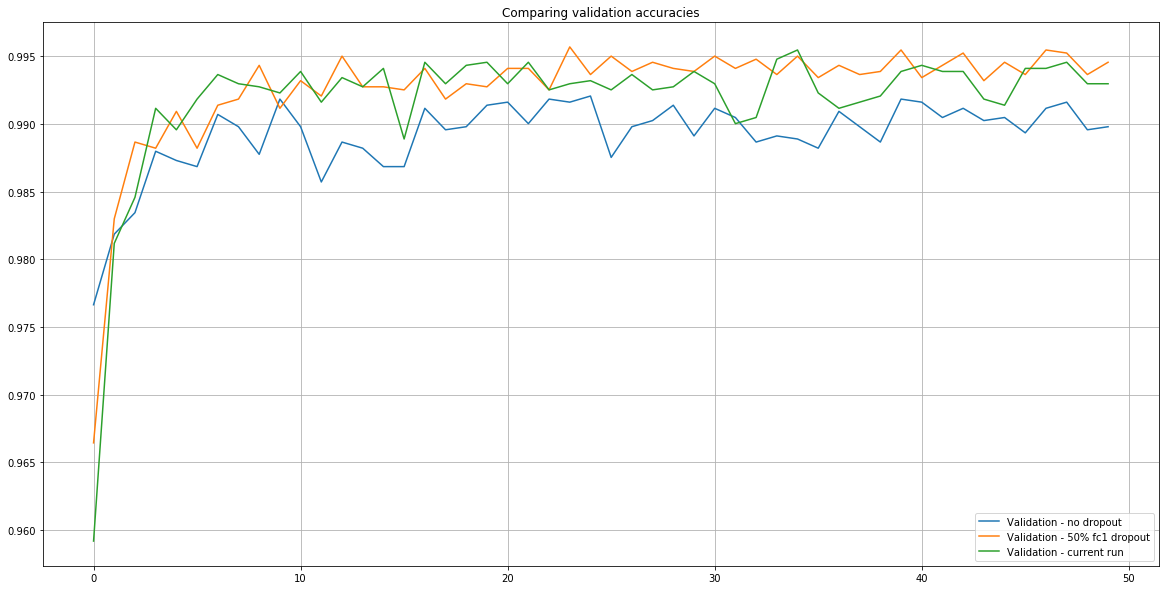

In [28]:
plot_epochs([
    (VALID_ACCURACIES_NO_DROPOUT, "Validation - no dropout"), 
    (VALID_ACCURACIES_DROPOUT_FC1_05, "Validation - 50% fc1 dropout"),
    (validation_accuracies, "Validation - current run")
], "Comparing validation accuracies")

In [29]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    
    test_accuracy = evaluate(sess, X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.973


---

## Step 3: Test a Model on New Images


### Load and Output the Images

In [30]:
import matplotlib.image as mpimg

I downloaded the first 7 images that I could find in Google Image Search using "German traffic signs" search query and that corresponded to traffic sign classes present in the dataset. After that, I used Photoshop to resize the images to 32x32. The images seem to have very high quality, which could be both a positive and a negative factor for the network: on one hand, it's easy to classify these images manually; on the other hand, the network has been trained on images that originally had way lower resolution, so there might be some intrinsic differences. 

In [31]:
X_web = np.array([mpimg.imread('test_images/' + str(i+1) + '.jpg') for i in range(7)])
X_web.shape

(7, 32, 32, 3)

In [32]:
y_web = np.array([14, 15, 9, 12, 2, 14, 2])

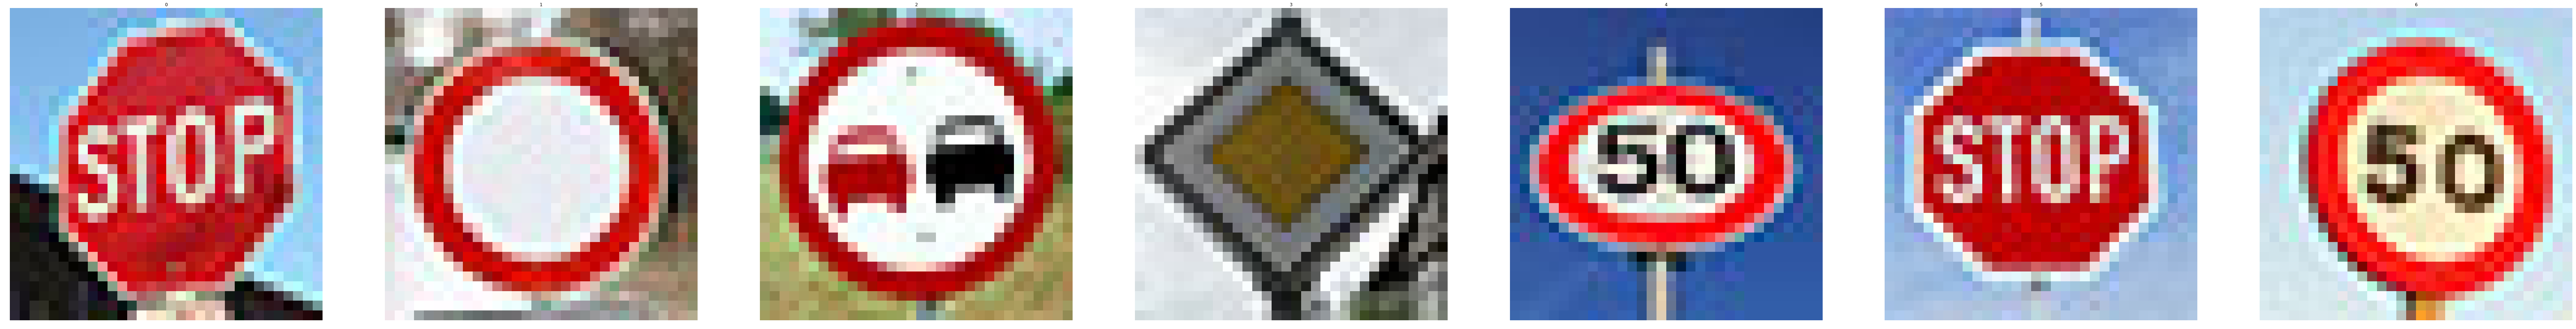

In [33]:
plot_dataset(X_web, nrows=1, ncols=7)

In [34]:
X_web_norm = standardize_dataset(preprocess_dataset(X_web), mean_pixel=mean_pixel, std_pixel=std_pixel)[0]

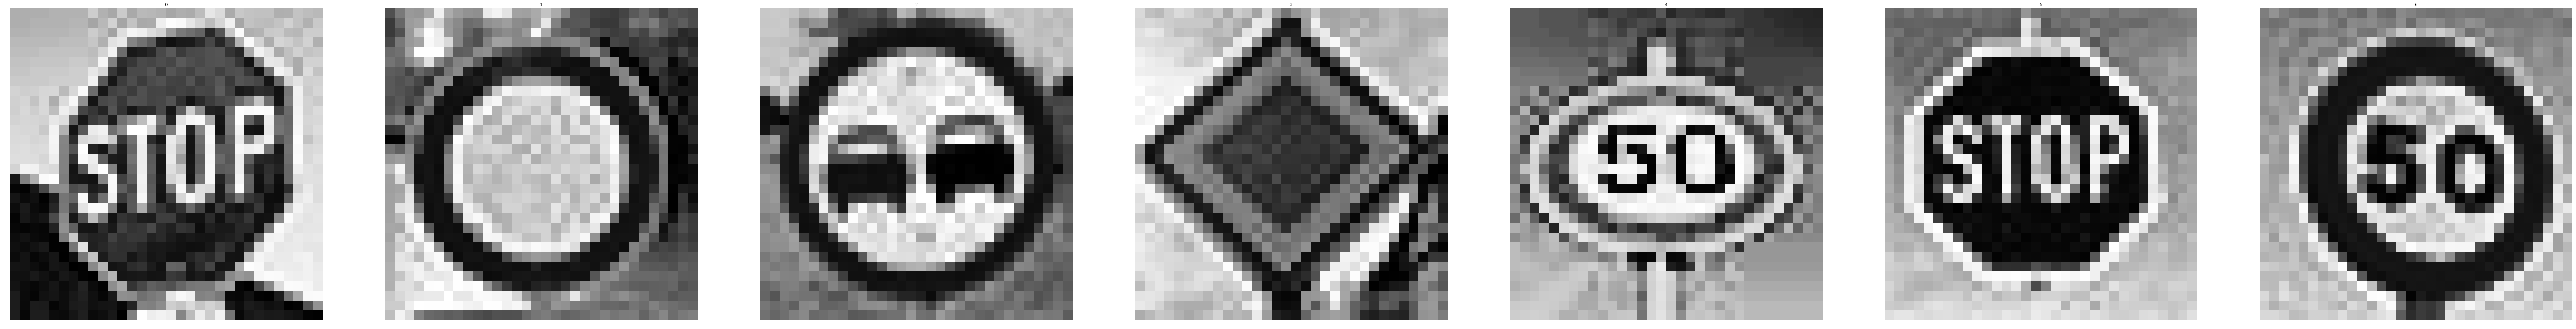

In [35]:
plot_dataset(X_web_norm, nrows=1, ncols=7, cmap="gray")

### Predict the Sign Type for Each Image

In [36]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
web_sess = tf.Session()

saver.restore(web_sess, "./lenet")
accuracy_web = accuracy_operation.eval(session=web_sess, feed_dict={x : X_web_norm, y : y_web})
predictions_web = logits_test.eval(session=web_sess, feed_dict={x : X_web_norm})


INFO:tensorflow:Restoring parameters from ./lenet


### Analyze Performance

In [37]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print(accuracy_web)

0.714286


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [38]:
import pandas
signnames = pandas.read_csv("signnames.csv")

In [39]:
topK = web_sess.run(tf.nn.top_k(tf.nn.softmax(logits_test), k=5), feed_dict={x : X_web_norm})

In [40]:
print("| Image              |       Prediction   | Second best         |")
print("|:------------------:|:------------------:|:-------------------:|")
for i in range(len(y_web)):
    print("|%20s|%20s|%21s|" % (
        signnames.loc[y_web[i], "SignName"], 
        signnames.loc[topK.indices[i][0], "SignName"], 
        signnames.loc[topK.indices[i][1], "SignName"]
    ))


| Image              |       Prediction   | Second best         |
|:------------------:|:------------------:|:-------------------:|
|                Stop|                Stop|     Turn right ahead|
|         No vehicles|Speed limit (100km/h)|          No vehicles|
|          No passing|          No passing|Vehicles over 3.5 metric tons prohibited|
|       Priority road|       Priority road| Roundabout mandatory|
|Speed limit (50km/h)|Speed limit (50km/h)| Speed limit (30km/h)|
|                Stop|                Stop| Speed limit (60km/h)|
|Speed limit (50km/h)|Speed limit (60km/h)| Speed limit (80km/h)|


In [41]:
for i in range(len(y_web)):
    print("|Prediction                                        |Probability|")
    print("|:------------------------------------------------:|:---------:|")
    for j in range(len(topK.indices[i])):
        print("|%50s|%11.2f|" % (
            signnames.loc[topK.indices[i][j], "SignName"], 
            topK.values[i][j]
        ))
    print()


|Prediction                                        |Probability|
|:------------------------------------------------:|:---------:|
|                                              Stop|       1.00|
|                                  Turn right ahead|       0.00|
|                                        Keep right|       0.00|
|                              Speed limit (80km/h)|       0.00|
|                              Speed limit (60km/h)|       0.00|

|Prediction                                        |Probability|
|:------------------------------------------------:|:---------:|
|                             Speed limit (100km/h)|       1.00|
|                                       No vehicles|       0.00|
|                              Speed limit (60km/h)|       0.00|
|                              Speed limit (80km/h)|       0.00|
|                                     Priority road|       0.00|

|Prediction                                        |Probability|
|:---------------------

In [42]:
web_sess.close()

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images


In [43]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess, feed_dict={x : image_input})
    featuremaps = activation.shape[-1]
    plt.figure(plt_num, figsize=(20,15))
    for featuremap in range(featuremaps):
        plt.subplot(6, 8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

The following cell visualizes the first 3 convolutional layers in detail.

It's easy to see that the first two layers identify different sorts of edges present in the images.

Layer 3 is much harder to interpret.

INFO:tensorflow:Restoring parameters from ./lenet


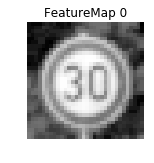

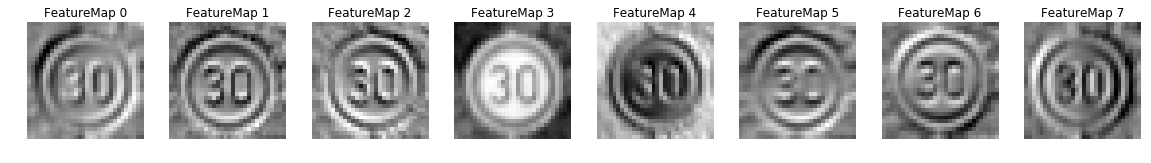

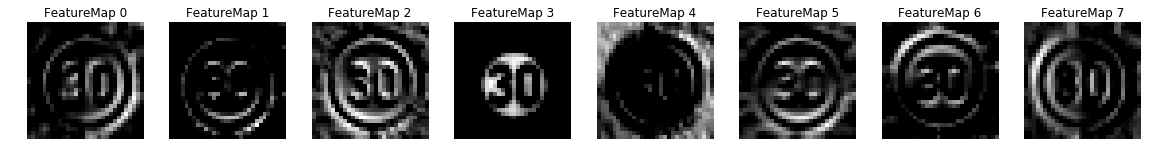

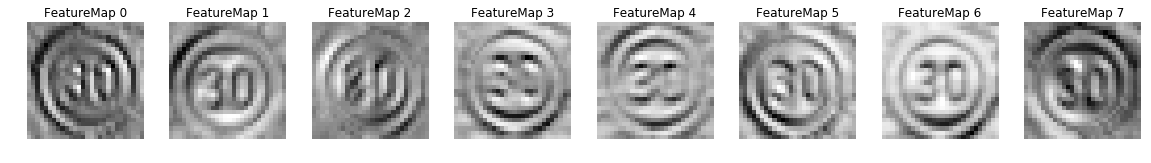

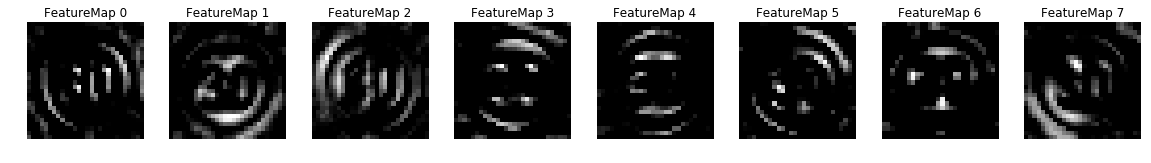

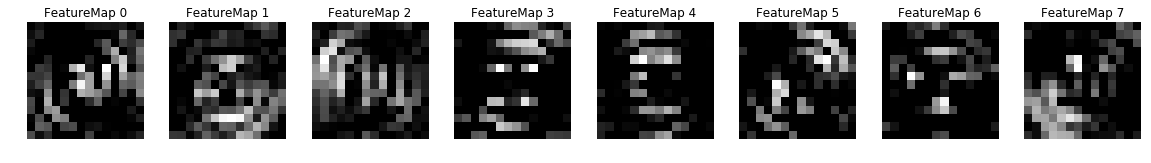

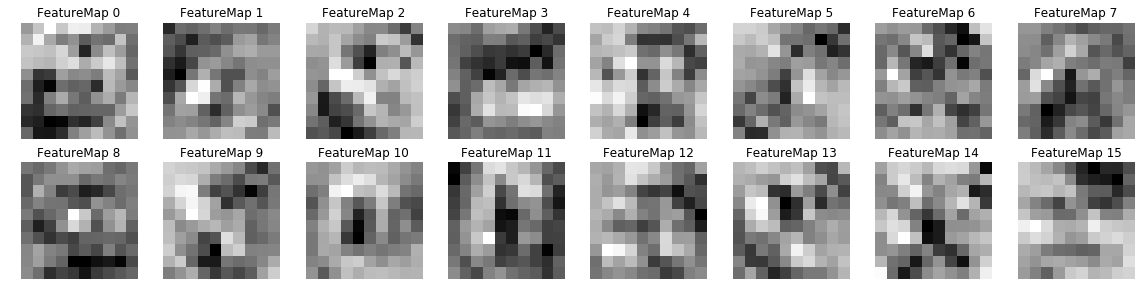

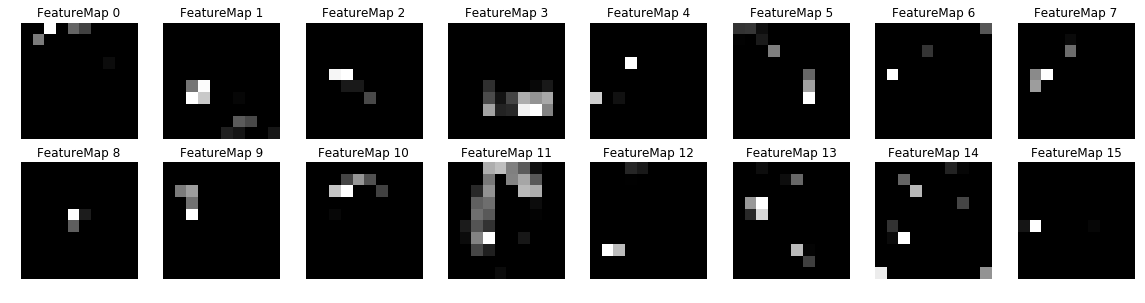

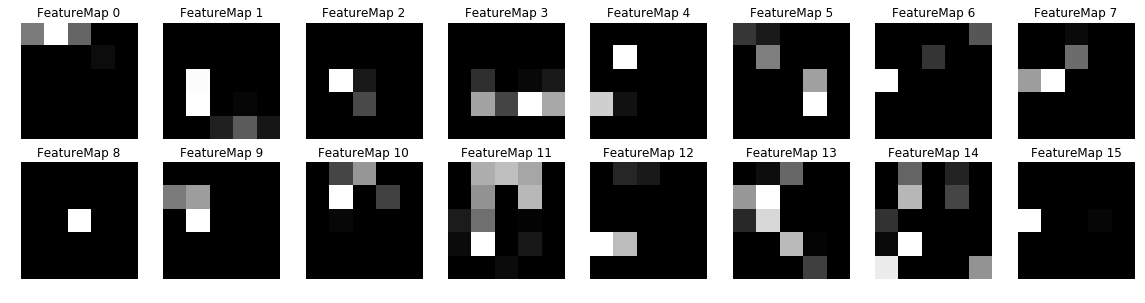

In [44]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    img_500 = X_valid_norm[500]
    outputFeatureMap([img_500], x, plt_num=1)
    outputFeatureMap([img_500], net_dict["conv1_Wb"], plt_num=2)
    outputFeatureMap([img_500], net_dict["conv1_relu"], plt_num=3)
    outputFeatureMap([img_500], net_dict["conv2_Wb"], plt_num=4)
    outputFeatureMap([img_500], net_dict["conv2_relu"], plt_num=5)
    outputFeatureMap([img_500], net_dict["conv2"], plt_num=6)
    outputFeatureMap([img_500], net_dict["conv3_Wb"], plt_num=7)
    outputFeatureMap([img_500], net_dict["conv3_relu"], plt_num=8)
    outputFeatureMap([img_500], net_dict["conv3"], plt_num=9)


Here's another visualization of the first two layers processing different images.

It's interesting to see how the first layer produces different filters for inputs. Usually one of these filters looks like a negation of the image.

INFO:tensorflow:Restoring parameters from ./lenet


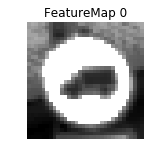

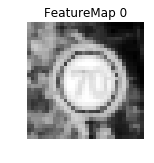

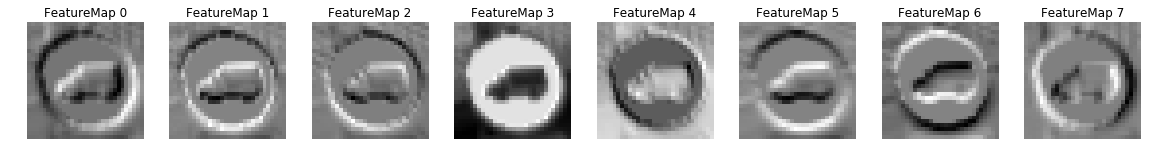

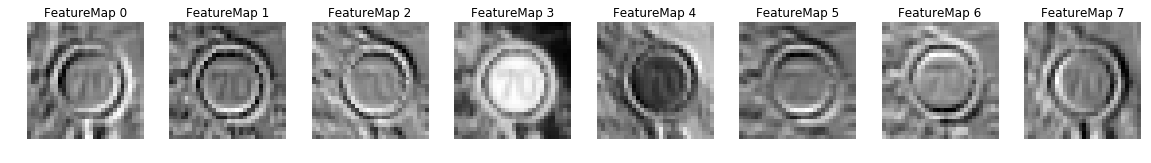

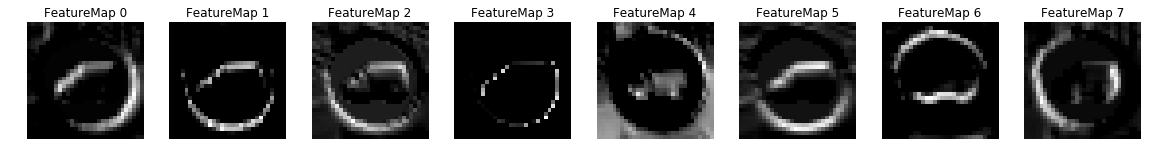

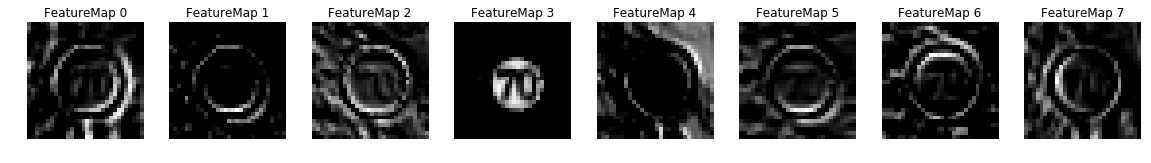

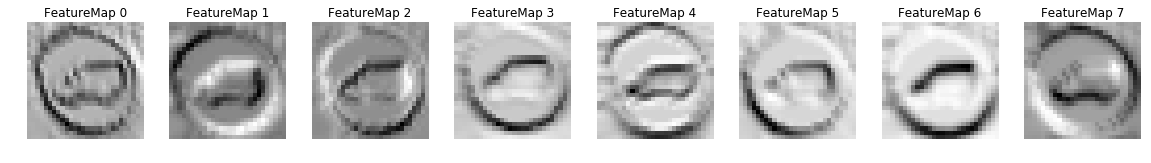

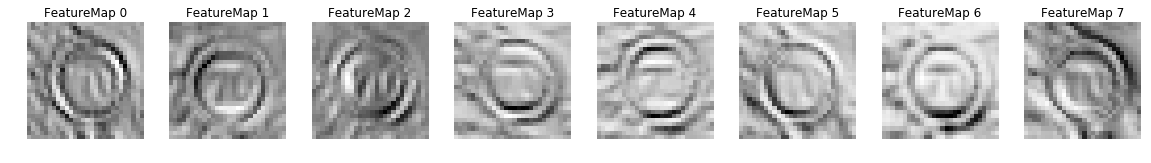

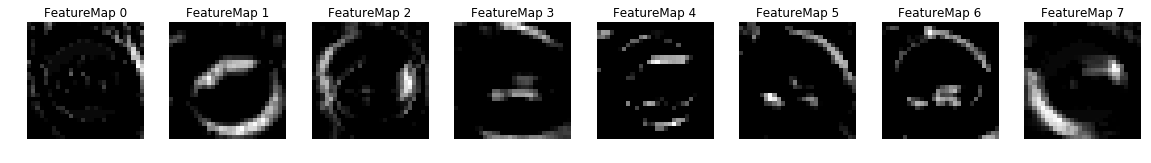

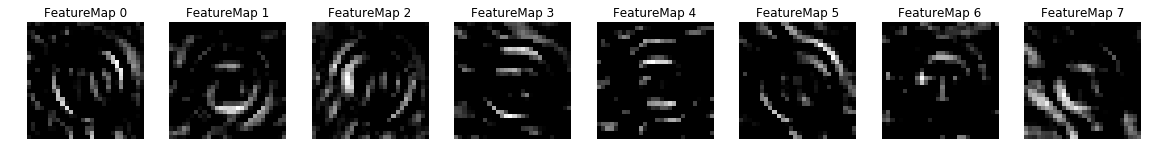

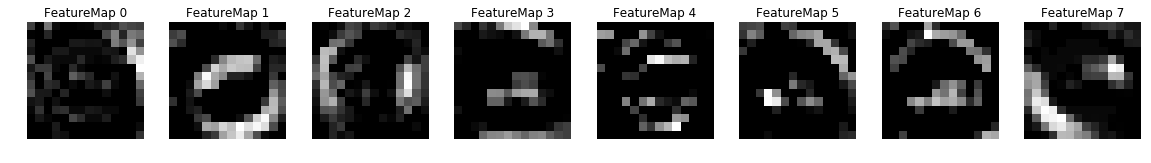

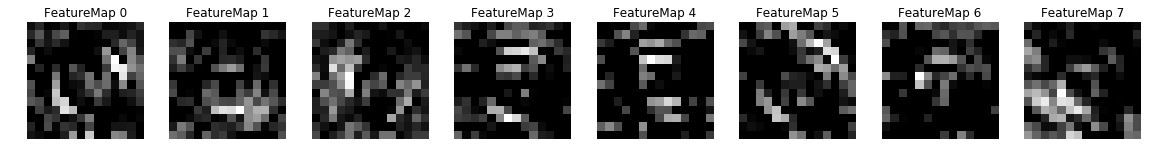

In [45]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    img_700 = X_valid_norm[700]
    img_1000 = X_valid_norm[1000]
    outputFeatureMap([img_700],  x, plt_num=1)
    outputFeatureMap([img_1000], x, plt_num=2)
    outputFeatureMap([img_700],  net_dict["conv1_Wb"], plt_num=3)
    outputFeatureMap([img_1000], net_dict["conv1_Wb"], plt_num=4)
    outputFeatureMap([img_700],  net_dict["conv1_relu"], plt_num=5)
    outputFeatureMap([img_1000], net_dict["conv1_relu"], plt_num=6)
    outputFeatureMap([img_700],  net_dict["conv2_Wb"], plt_num=7)
    outputFeatureMap([img_1000], net_dict["conv2_Wb"], plt_num=8)
    outputFeatureMap([img_700],  net_dict["conv2_relu"], plt_num=9)
    outputFeatureMap([img_1000], net_dict["conv2_relu"], plt_num=10)
    outputFeatureMap([img_700],  net_dict["conv2"], plt_num=11)
    outputFeatureMap([img_1000], net_dict["conv2"], plt_num=12)


The following two cells display images that achieve maximum activation of neurons in the first fully connected layer.

I tried to do the same for the last convolutional layer and didn't find any easily understandable relationships.

In [46]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    activations = []
    for offset in range(0, len(X_train_norm_aug), BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x = X_train_norm_aug[offset:end]
        activation = sess.run(net_dict["fc1"], feed_dict={x: batch_x})
        activations.append(np.transpose(activation))
    activations = np.hstack(activations)
    top_indices = sess.run(tf.nn.top_k(activations, k=8)).indices
    

INFO:tensorflow:Restoring parameters from ./lenet


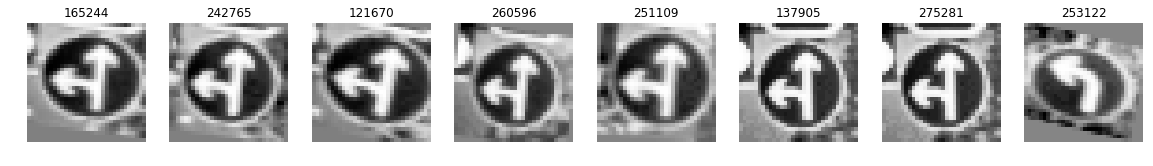

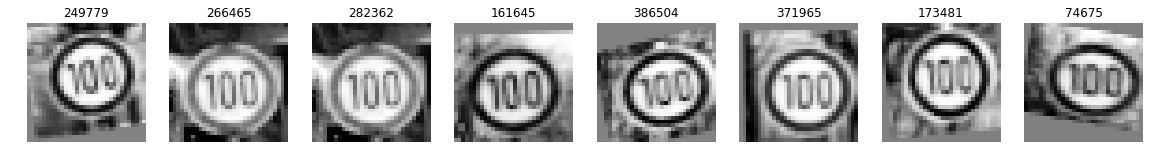

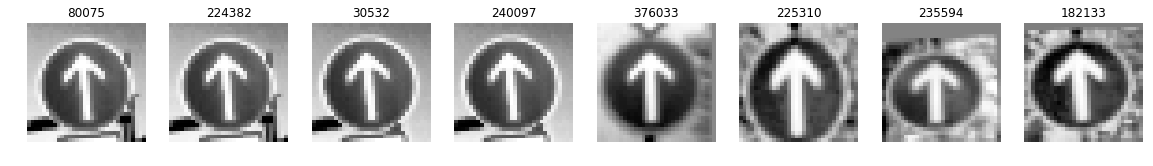

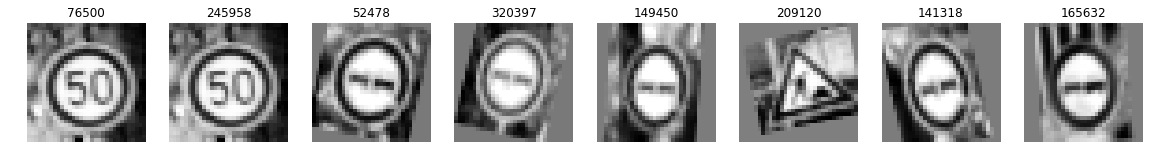

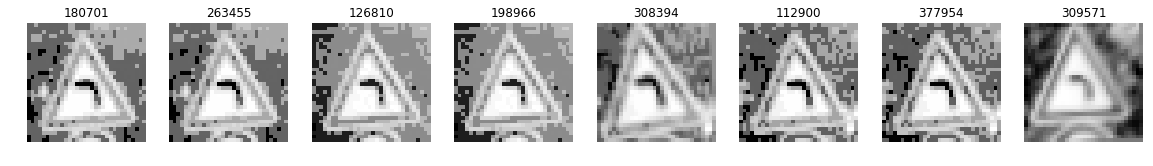

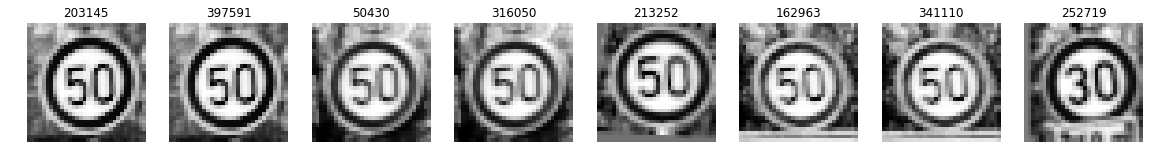

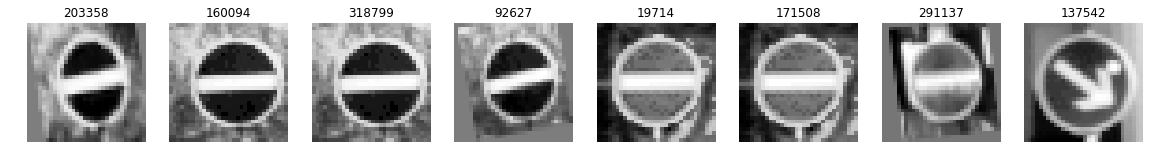

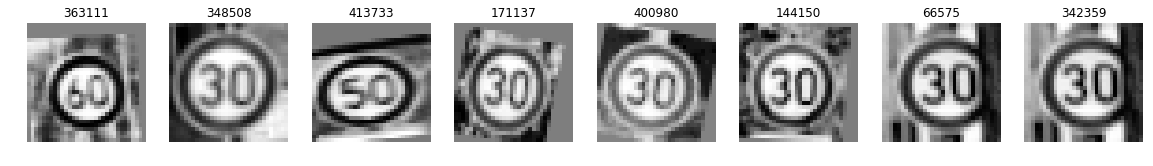

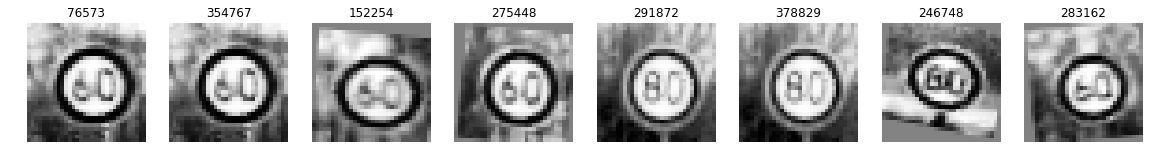

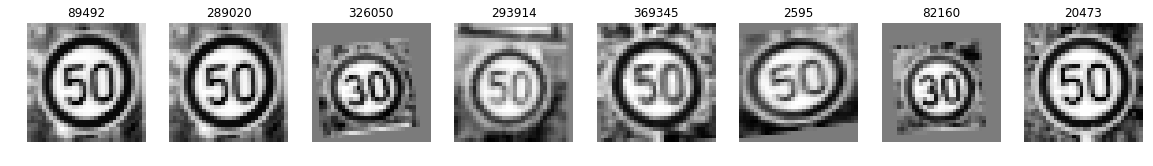

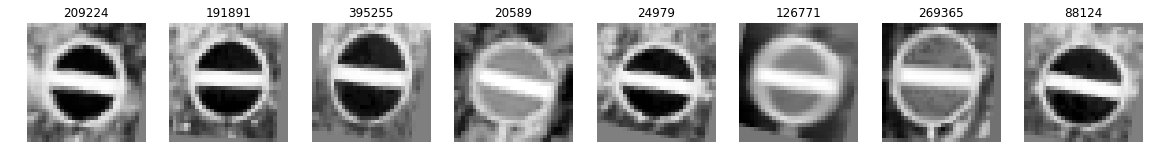

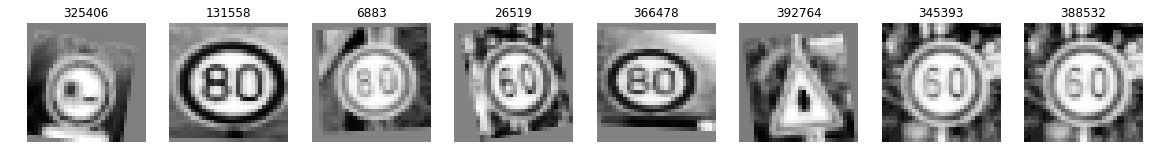

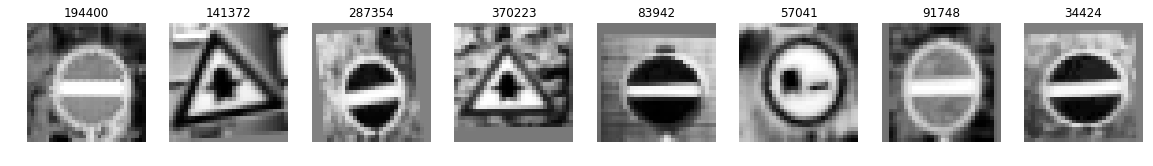

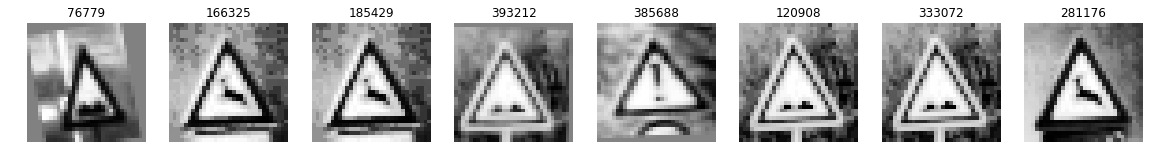

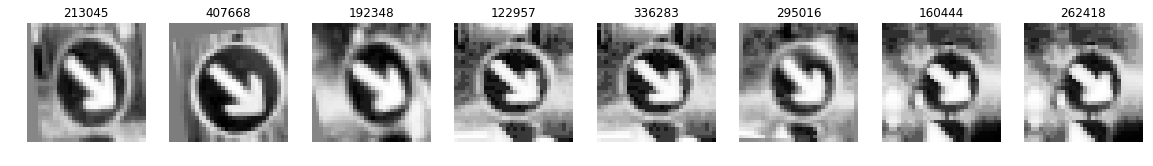

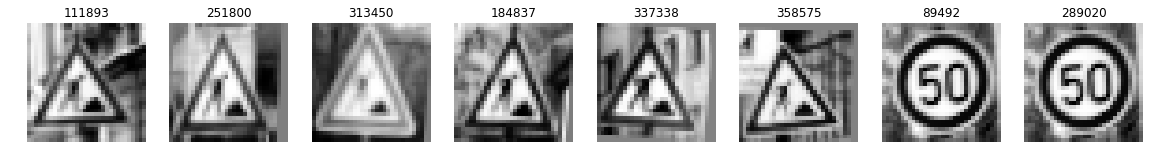

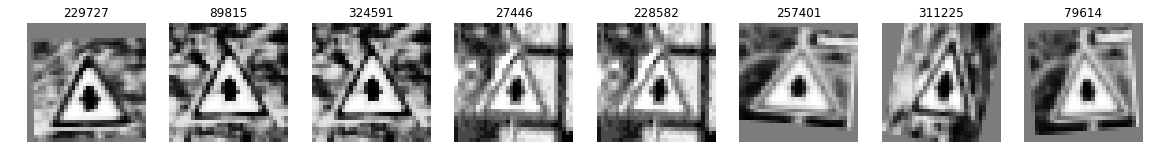

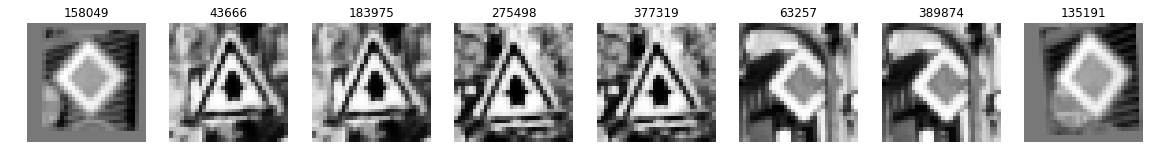

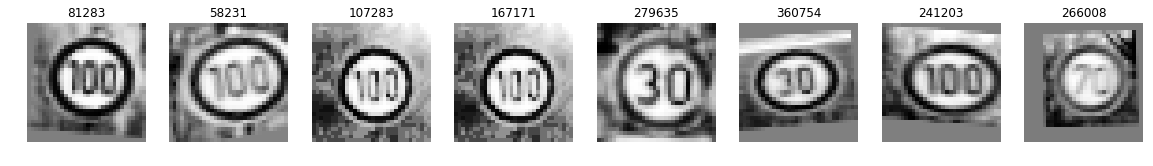

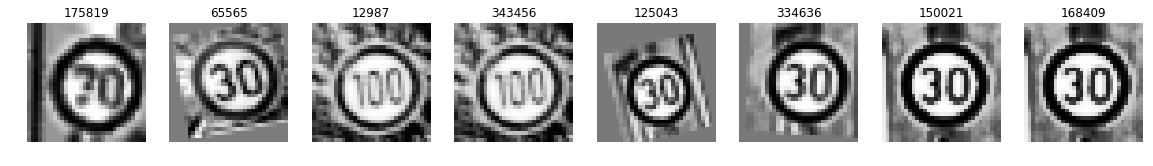

In [47]:
for i in range(20):
    plt.figure(i+1, figsize=(20,15))
    for j in range(len(top_indices[i])):
        plt.subplot(1, 8, j + 1)
        plt.title(str(top_indices[i][j]))
        imshow(X_train_norm_aug[top_indices[i][j]], cmap="gray")


The last visualizations demonstrate the types of edge filters built in the first two convolutional layers.

In [48]:
def plot_conv_layer(tf_weights):
    with tf.Session() as sess:
        saver.restore(sess, "./lenet")
        weights = tf_weights.eval(session=sess)
        print(weights.shape)
        input_channels = weights.shape[-2]
        featuremaps = weights.shape[-1]
        plt.figure(figsize=(15,15))
        for i in range(featuremaps):
            for j in range(input_channels):
                plt.subplot(featuremaps, input_channels, i * input_channels + j + 1)
                plt.axis('off')
                plt.imshow(np.reshape(weights[:, :, j, i], weights.shape[:2]), interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet
(3, 3, 1, 8)


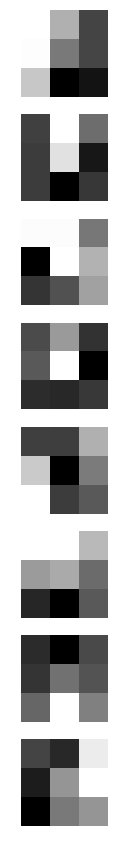

In [49]:
plot_conv_layer(net_dict["conv1_W"])

INFO:tensorflow:Restoring parameters from ./lenet
(3, 3, 8, 8)


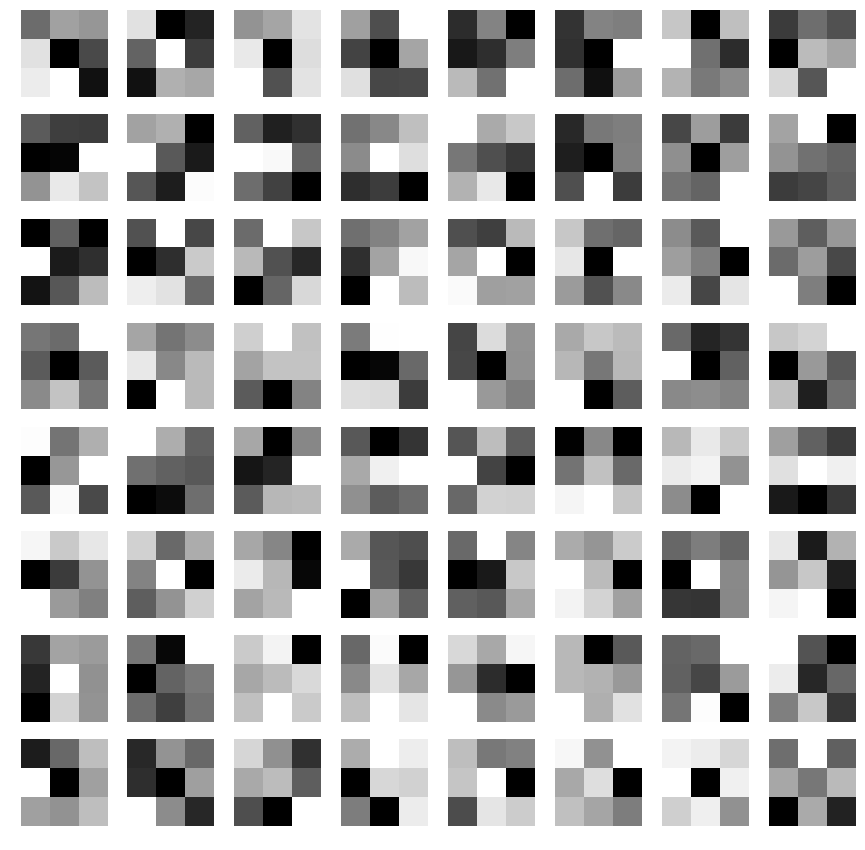

In [50]:
plot_conv_layer(net_dict["conv2_W"])